<a href="https://colab.research.google.com/github/strzelnat/Statistics_basics/blob/main/lessons/basics/lesson9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install scipy

In [45]:
import scipy.stats as stats
import math
import numpy as np
import matplotlib.pyplot as plt

In [30]:
population = stats.norm.rvs(size = 10000, loc = 45, scale = 5)
population_mean = population.mean()
population_std = population.std()

sample_size = 50
sample = np.random.choice(population, size = sample_size)
sample_mean = sample.mean()
sample_std = sample.std()

# calculate confidence interval for 80% confidence level with Z-distribution -> 100% - ((100% - 80%) / 2)
z_crtical = stats.norm.ppf(0.9)
margin_of_error = z_crtical * (population_std / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"80%-Confidence interval Z (basing on one sample): {confidence_interval}")

80%-Confidence interval Z (basing on one sample): (np.float64(44.341476247795505), np.float64(46.137909370160706))


In [31]:
population = stats.norm.rvs(size=100000, loc = 40, scale = 8)
population_mean = population.mean()
population_std = population.std()


# calculate confidence interval for 90% confidence level with Z-distribution -> 100% - ((100% - 90%) / 2)
sample_size = 30
sample = np.random.choice(population, size = sample_size)
sample_mean = sample.mean()
sample_std = sample.std()

z_crtical = stats.norm.ppf(0.95)
margin_of_error = z_crtical * (population_std / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"90%-Confidence interval Z (basing on one sample): {confidence_interval}")

90%-Confidence interval Z (basing on one sample): (np.float64(39.38320336816761), np.float64(44.20635115417293))


In [32]:
population = stats.norm.rvs(size=100000, loc = 40, scale = 8)
population_mean = population.mean()
population_std = population.std()


# calculate confidence interval for 95% confidence level with Z-distribution -> 100% - ((100% - 90%) / 2)
sample_size = 30
sample = np.random.choice(population, size = sample_size)
sample_mean = sample.mean()
sample_std = sample.std()

z_crtical = stats.norm.ppf(0.975)
margin_of_error = z_crtical * (population_std / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"95%-Confidence interval Z (basing on one sample): {confidence_interval}")

95%-Confidence interval Z (basing on one sample): (np.float64(37.0959543736297), np.float64(42.80759583275684))


In [36]:
# calculate confidence of inetrval = 99%
population = stats.norm.rvs(size=100000, loc = 40, scale = 8)
population_mean = population.mean()
population_std = population.std()


# calculate confidence interval for 100% confidence level with Z-distribution -> 100% - ((100% - 90%) / 2)
sample_size = 30
sample = np.random.choice(population, size = sample_size)
sample_mean = sample.mean()
sample_std = sample.std()

z_crtical = stats.norm.ppf(0.995)
margin_of_error = z_crtical * (population_std / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"99%-Confidence interval Z (basing on one sample): {confidence_interval}")
print(f'Min: {population.min()}')
print(f'Max: {population.max()}')

99%-Confidence interval Z (basing on one sample): (np.float64(38.42208884339675), np.float64(45.95949081774502))
Min: 6.182900746722638
Max: 77.46173818872833


In [37]:
#the fastest automatic way
interval = stats.norm.interval(confidence=0.995, loc = sample_mean, scale = population_std / math.sqrt(sample_size))
interval

(np.float64(38.08381313020756), np.float64(46.297766530934226))

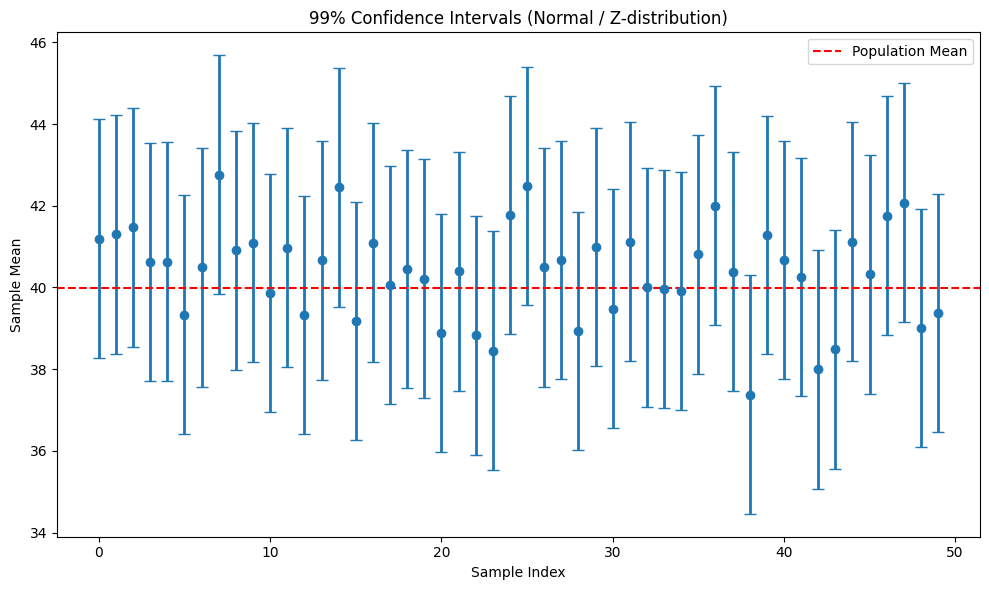

In [66]:
sample_size = 50
sample_means = []
margin_of_errors = []


z_critical = stats.norm.ppf(0.995)

for _ in range(50):
    sample = np.random.choice(population, size=sample_size)
    sample_mean = sample.mean()
    sample_means.append(sample_mean)

    margin = z_critical * (population_std / math.sqrt(sample_size))
    margin_of_errors.append(margin)


plt.figure(figsize=(10, 6))
plt.title("99% Confidence Intervals (Normal / Z-distribution)")
plt.errorbar(
    x=np.arange(50),
    y=sample_means,
    yerr=margin_of_errors,
    fmt='o',
    capsize=4,
    elinewidth=2
)
plt.axhline(y=population_mean, color='red', linestyle='--', label='Population Mean')
plt.xlabel("Sample Index")
plt.ylabel("Sample Mean")
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
# T-Student
# calculate confidence of inetrval = 99%
population = stats.norm.rvs(size=100000, loc = 40, scale = 8)
population_mean = population.mean()
#population_std = population.std() no information


# calculate confidence interval for 100% confidence level with Z-distribution -> 100% - ((100% - 90%) / 2)
sample_size = 30
sample = np.random.choice(population, size = sample_size)
sample_mean = sample.mean()
sample_std = sample.std()

z_crtical = stats.t.ppf(q = 0.995, df = sample_size - 1)
margin_of_error = z_crtical * (sample_std / math.sqrt(sample_size))
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
print(f"99%-Confidence interval Z (basing on one sample): {confidence_interval}")
print(f'Min: {population.min()}')
print(f'Max: {population.max()}')

99%-Confidence interval Z (basing on one sample): (np.float64(36.59309899779326), np.float64(44.40391738126171))
Min: -2.827651542960261
Max: 75.10626937954527


In [40]:
interval = stats.t.interval(df = sample_size - 1, loc = sample_mean, confidence=0.995, scale = sample_std / math.sqrt(sample_size))
interval

(np.float64(36.19402540050791), np.float64(44.80299097854707))

## **Use the t-distribution when you don’t know the population standard deviation, especially if the sample size is small (< 30)**

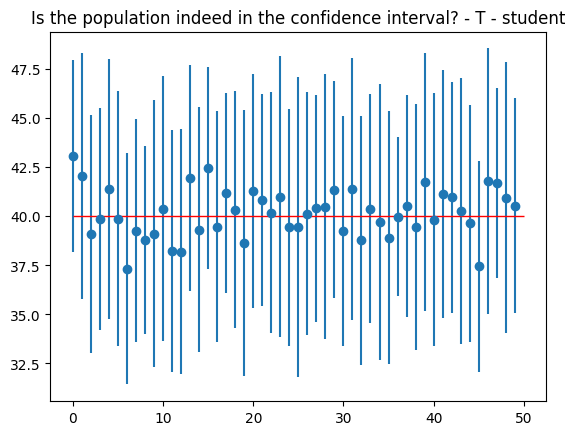

In [63]:
#what's gonna happen when i do not have normal distribution?
sample_size = 50

intervals = []
sample_means = []

for sample in range(50):
  sample = np.random.choice(population, size = sample_size)
  sample_mean = sample.mean()
  sample_std = sample.std()
  sample_means.append(sample_mean)

  t_critical = stats.t.ppf(q = 0.995, df = sample_size - 1)
  margin_of_error = t_critical * (sample_std /math.sqrt(sample_size))
  confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
  intervals.append(confidence_interval)

plt.figure()
plt.title('Is the population indeed in the confidence interval? - T - student')
plt.errorbar(
      x = np.arange(0, 50, 1),
      y = sample_means,
      fmt = 'o',
      yerr = [(e-b) for b,e in intervals]
  )

plt.hlines(y = population_mean, xmin = 0, xmax = 50, color = 'red', linewidth = 1)